In [57]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for gamma correction
def gamma_correction(image, gamma=1.0):
    """
    Apply gamma correction to the input image to adjust brightness.

    :param image: The input image (BGR format).
    :param gamma: The gamma factor for correction.
    :return: Gamma-corrected image (BGR format).
    """
    gamma_corrected = np.power(image / 255.0, gamma)
    gamma_corrected = (gamma_corrected * 255).astype(np.uint8)
    return gamma_corrected


In [58]:
# Function for preprocessing the image
def preprocess_image(image):
    """
    Preprocess the input image for lane detection.

    :param image: The input image (BGR format).
    :return: Preprocessed image (grayscale, gamma-corrected).
    """
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply gamma correction to enhance brightness
    gamma_corrected_image = gamma_correction(grayscale_image, gamma=1.5)

    return gamma_corrected_image


In [59]:
# Function for detecting lane edges using Canny edge detection
def detect_lane_edges(image):
    """
    Detect lane edges using Canny edge detection.

    :param image: The preprocessed image (grayscale, gamma-corrected).
    :return: Lane edges (binary mask).
    """
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 50, 150)

    return edges


In [60]:
# Function for creating an ROI mask based on vertices
def create_roi_mask(image, vertices):
    """
    Create a region of interest (ROI) mask based on vertices.

    :param image: The input image.
    :param vertices: Vertices of the polygon defining the ROI.
    :return: ROI mask (binary mask).
    """
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, vertices, 255)
    return mask


In [61]:
# Load the image
image_path = '/content/aachen_000064_000019_leftImg8bit.png'
image = cv2.imread(image_path)


In [62]:
# Preprocess the image for lane detection
preprocessed_image = preprocess_image(image)


In [63]:
# Define vertices for the region of interest (ROI)
height, width = preprocessed_image.shape
roi_bottom_left = (0, height)
roi_top_left = (width * 0.4, height * 0.6)
roi_top_right = (width * 0.6, height * 0.6)
roi_bottom_right = (width, height)
roi_vertices = np.array([[roi_bottom_left, roi_top_left, roi_top_right, roi_bottom_right]], dtype=np.int32)


In [64]:
# Create an ROI mask
roi_mask = create_roi_mask(preprocessed_image, roi_vertices)


In [65]:
# Apply the ROI mask to the detected lane edges
lane_edges_roi = cv2.bitwise_and(detect_lane_edges(preprocessed_image), roi_mask)


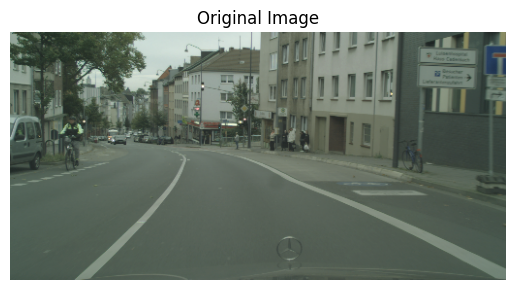

In [66]:
# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


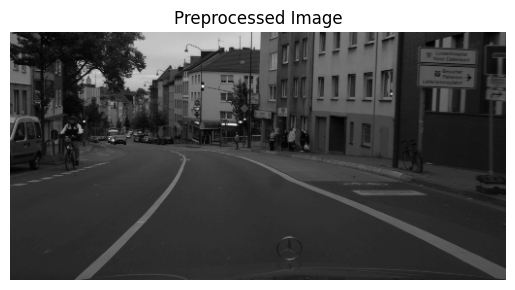

In [67]:
# Display the preprocessed image
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


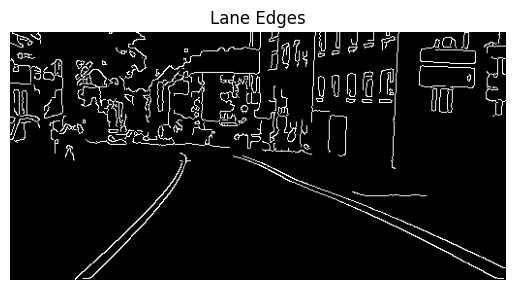

In [68]:
# Display the lane edges
plt.imshow(detect_lane_edges(preprocessed_image), cmap='gray')
plt.title('Lane Edges')
plt.axis('off')
plt.show()


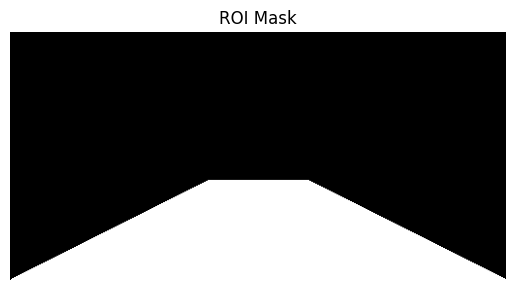

In [69]:
# Display the ROI mask
plt.imshow(roi_mask, cmap='gray')
plt.title('ROI Mask')
plt.axis('off')
plt.show()


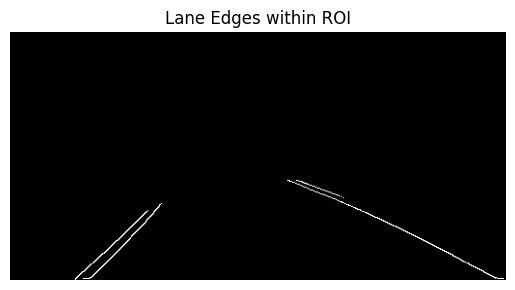

In [70]:
# Display the lane edges within the ROI
plt.imshow(lane_edges_roi, cmap='gray')
plt.title('Lane Edges within ROI')
plt.axis('off')
plt.show()
